In [344]:
%matplotlib inline

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.keys()
plt.rc('font', family='serif')
params = {
   'axes.labelsize': 30,
   'axes.linewidth': 1.5,
   'legend.fontsize': 25,
   'legend.frameon': False,
   'lines.linewidth': 2,
   'xtick.direction': 'in',
   'xtick.labelsize': 25,
   'xtick.major.bottom': True,
   'xtick.major.pad': 10,
   'xtick.major.size': 10,
   'xtick.major.width': 1,
   'xtick.minor.bottom': True,
   'xtick.minor.pad': 3.5,
   'xtick.minor.size': 5,
   'xtick.minor.top': True,
   'xtick.minor.visible': True,
   'xtick.minor.width': 1,
   'xtick.top': True,
   'ytick.direction': 'in',
   'ytick.labelsize': 25,
   'ytick.major.pad': 10,
   'ytick.major.size': 10,
   'ytick.major.width': 1,
   'ytick.minor.pad': 3.5,
   'ytick.minor.size': 5,
   'ytick.minor.visible': True,
   'ytick.minor.width': 1,
   'ytick.right': True,
   'figure.figsize': [10,10], # instead of 4.5, 4.5
   'savefig.format': 'eps',
   }
plt.rcParams.update(params)

In [359]:
# read in data
data = pd.read_csv("VizieR4041Flare.csv") 
print(data.dtypes)
# drop rows with NaNs
data=data.dropna()

KIC            int64
g_i          float64
Mass         float64
Prot         float64
Nfl            int64
Nfl68          int64
Lfl_Lkp      float64
e_Lfl_Lkp    float64
alpha        float64
beta         float64
M14            int64
C16            int64
_RA          float64
_DE          float64
dtype: object


# Fig 7 from Davenport 2016 (rotation peroid vs fractional flare luminosity)

Paper: https://iopscience.iop.org/article/10.3847/0004-637X/829/1/23 Missing 2 stars in first bin

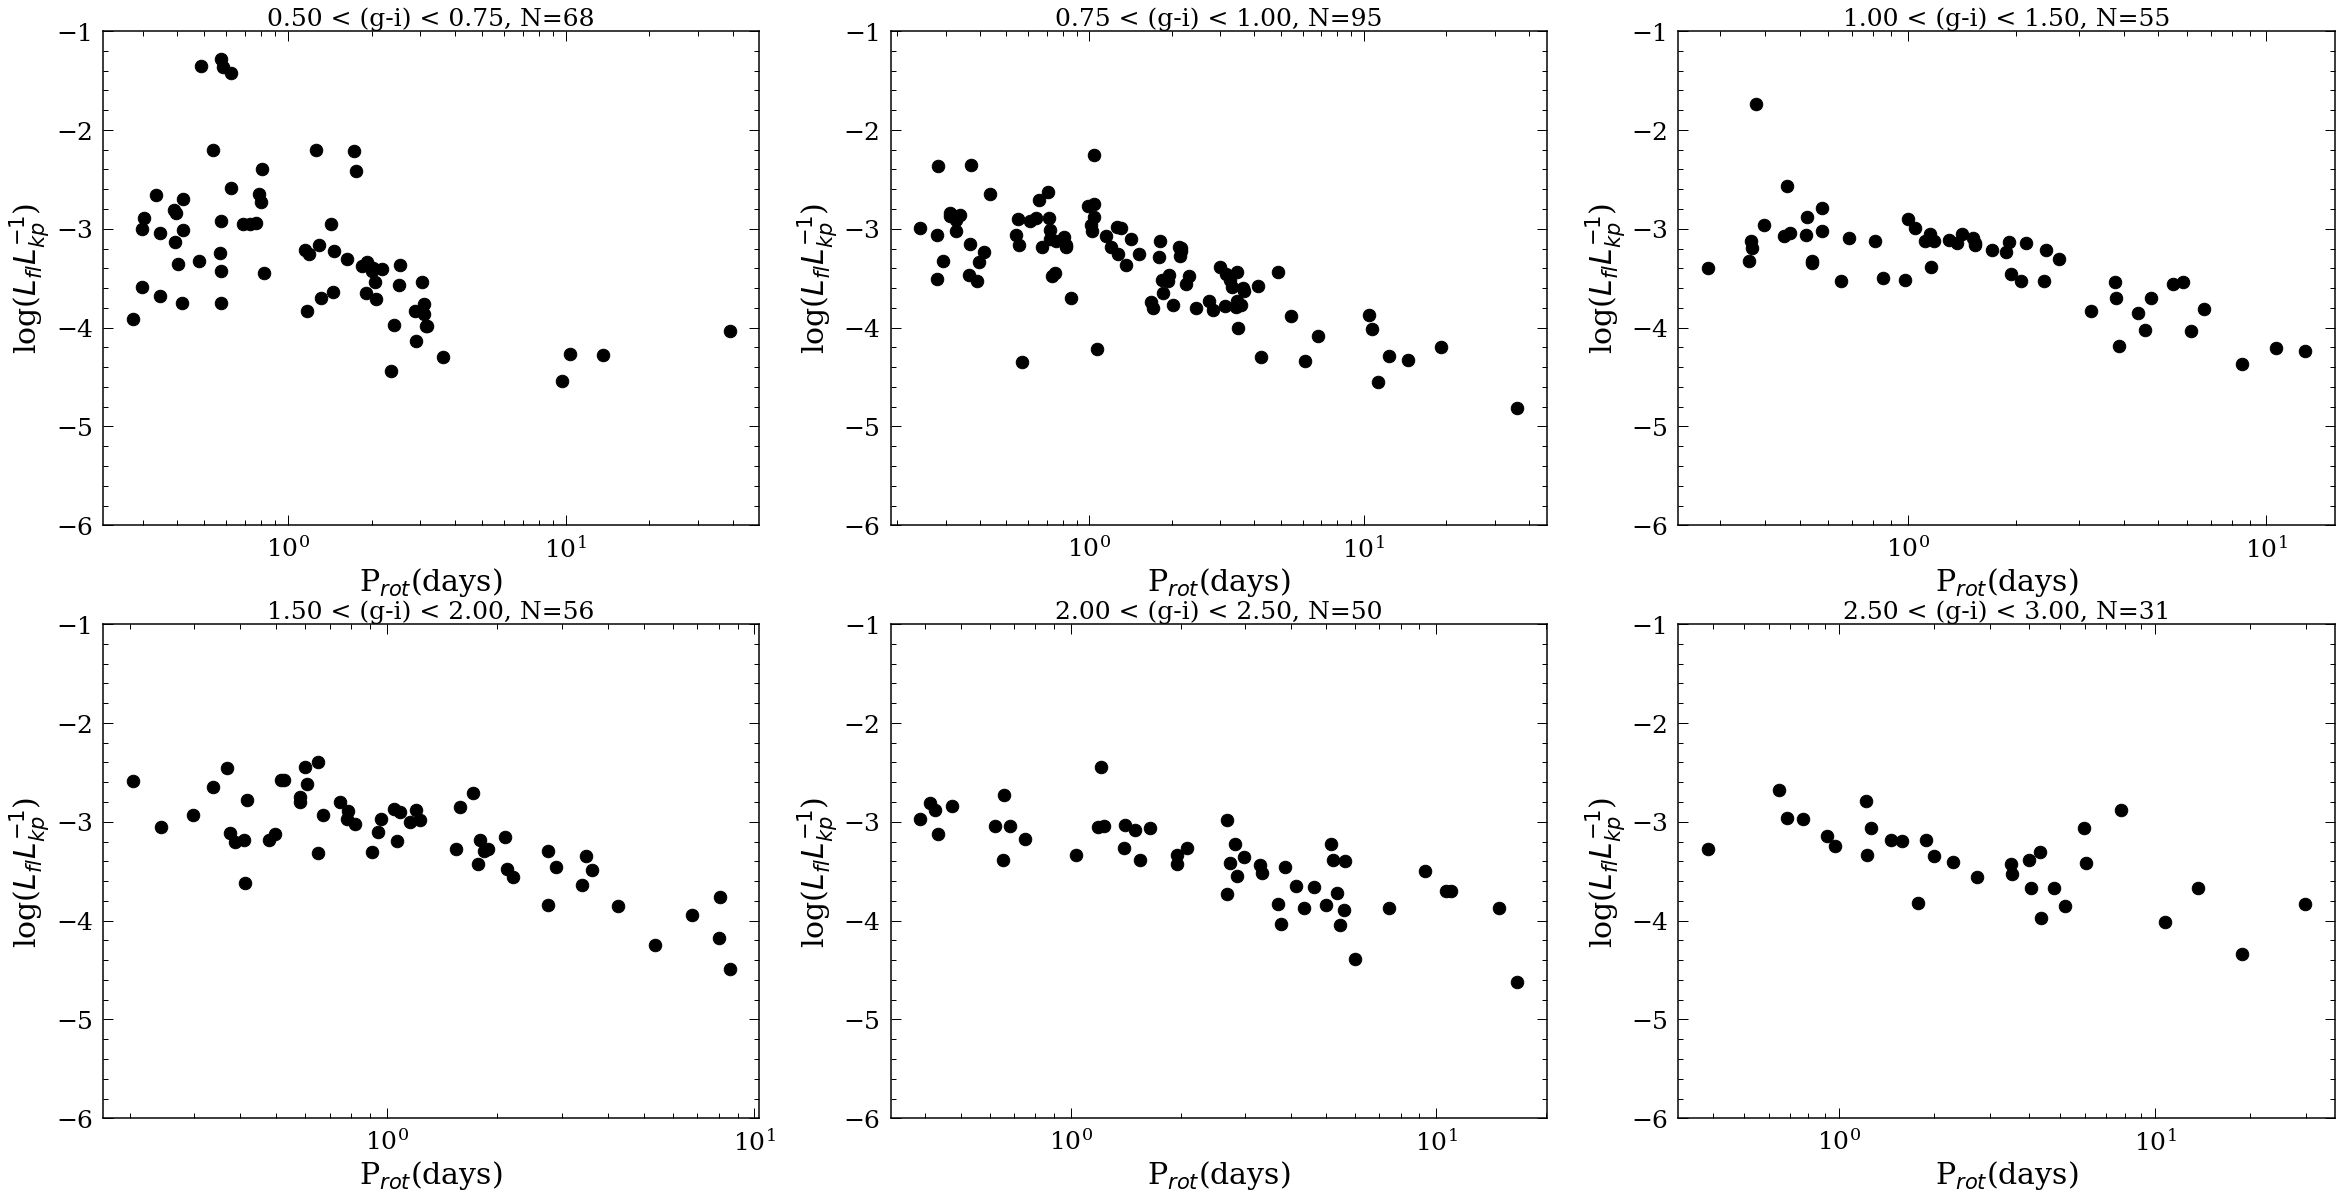

In [360]:
# sort by color
data=data.sort_values(by='g_i')

# sort into 6 bins, adding column 'group' for each bin
bins =[0.5, 0.75, 1., 1.5, 2., 2.5,3.]

# drop rows with NaNs from group
data=data_sort.dropna()
# plot each group
plt.figure(figsize=(40,20))
for i in range(6):
    plt.subplot(2,3,i+1)
    databin=data.loc[(data['g_i']>bins[i]) & (data['g_i']<bins[i+1])]
    plt.title('%.2f < (g-i) < %.2f, N=%d'%(bins[i],bins[i+1],len(databin.Prot)),fontsize=25)
    plt.semilogx(databin.Prot, np.log10(databin.Lfl_Lkp),'k.',markersize=25)
    plt.ylabel('log($L_{fl}L_{kp}^{-1}$)')
    plt.ylim([-6,-1])
    plt.xlabel('P$_{rot}$(days)')

In [361]:
# calculate rossby number from mass [solar mass] and period (R_o=P/tau)
# tau from Wright 2011 (https://iopscience.iop.org/article/10.1088/0004-637X/743/1/48/pdf) eqn 11
def rossby(Prot,mass):
    log_tau=1.16-1.49*np.log10(mass)-0.54*np.power(np.log10(mass),2.)
    return Prot/np.power(10.,log_tau)

# Fig 3 from Davenport 2019 (correctional factor polyfit)

Paper: https://arxiv.org/pdf/1901.00890.pdf

Text(0, 0.5, 'log($\\Psi$)')

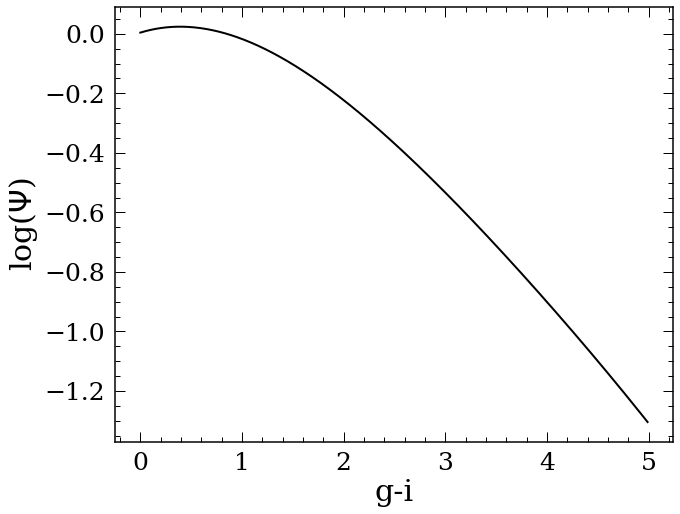

In [362]:
def Psi(g_i):
    logPsi=-0.0013*np.power(g_i,4.)+0.021*np.power(g_i,3.)-0.146*np.power(g_i,2.)+0.105*(np.array(g_i))+0.004
    return np.array([np.power(10.,i) for i in logPsi])

gi=[i*0.01 for i in range(int(5./0.01))]
plt.figure(figsize=(10,8))
plt.plot(gi,np.log10(Psi(gi)),'k-')
plt.xlabel('g-i')
plt.ylabel('log($\Psi$)')

# Fig 4 from Davenport 2019 (Rossby number vs flare energy)

Mostly matches

"\n# flare strength (missing L_kp)\nplt.figure(figsize=(8,5))\nplt.scatter(Ro,np.log10(LflLkp*data.Nfl),c=data.Mass,s=35, cmap=cm,edgecolors='k')\nplt.xscale('log')\ncb=plt.colorbar()\ncb.set_label('Mass (M$_\\odot$)')\nplt.ylim([-5,-1.5])\nplt.xlim([8e-3,4])\nplt.ylabel('log($L_{fl}L_{bol}^{-1}$)')\nplt.xlabel('Ro=P$_{rot}$/$\\tau$')\n"

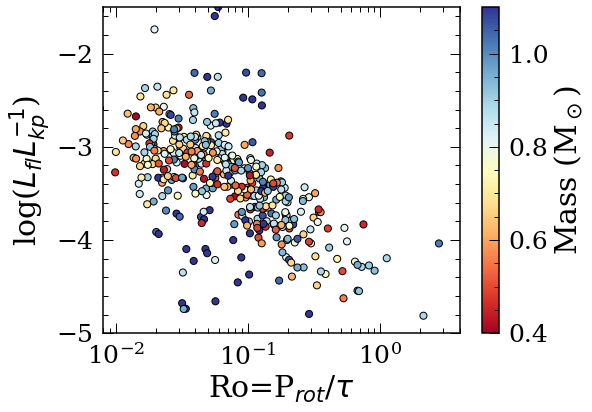

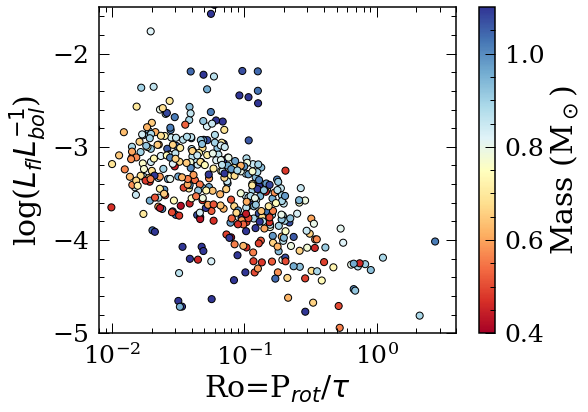

In [363]:
# correct for fractional flare luminosity
CorF=Psi(data.g_i)
LflLkp=data.Lfl_Lkp*CorF # corrected FFL
Ro=rossby(data.Prot,data.Mass)

cm = plt.cm.get_cmap('RdYlBu')

# original
plt.figure(figsize=(8,6))
plt.scatter(Ro,np.log10(data.Lfl_Lkp),c=data.Mass,s=50,vmin=0.4,vmax=1.1, cmap=cm,edgecolors='k')
plt.xscale('log')
cb=plt.colorbar()
cb.set_label('Mass (M$_\odot$)')
plt.ylim([-5,-1.5])
plt.xlim([8e-3,4])
plt.ylabel('log($L_{fl}L_{kp}^{-1}$)')
plt.xlabel('Ro=P$_{rot}$/$\\tau$')

# corrected
plt.figure(figsize=(8,6))
plt.scatter(Ro,np.log10(LflLkp),c=data.Mass,s=50, vmin=0.4,vmax=1.1,cmap=cm,edgecolors='k')
plt.xscale('log')
cb=plt.colorbar()
cb.set_label('Mass (M$_\odot$)')
plt.ylim([-5,-1.5])
plt.xlim([8e-3,4])
plt.ylabel('log($L_{fl}L_{bol}^{-1}$)')
plt.xlabel('Ro=P$_{rot}$/$\\tau$')

'''
# flare strength (missing L_kp)
plt.figure(figsize=(8,5))
plt.scatter(Ro,np.log10(LflLkp*data.Nfl),c=data.Mass,s=35, cmap=cm,edgecolors='k')
plt.xscale('log')
cb=plt.colorbar()
cb.set_label('Mass (M$_\odot$)')
plt.ylim([-5,-1.5])
plt.xlim([8e-3,4])
plt.ylabel('log($L_{fl}L_{bol}^{-1}$)')
plt.xlabel('Ro=P$_{rot}$/$\\tau$')
'''

# Fig 5 from Davenport 2019

Mostly matches

Text(0.5, 0, 'g-i (mag)')

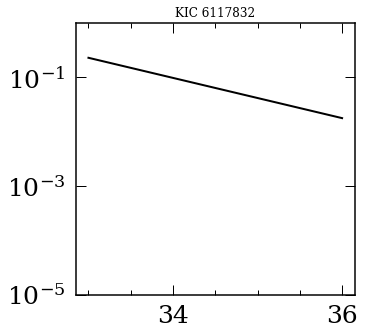

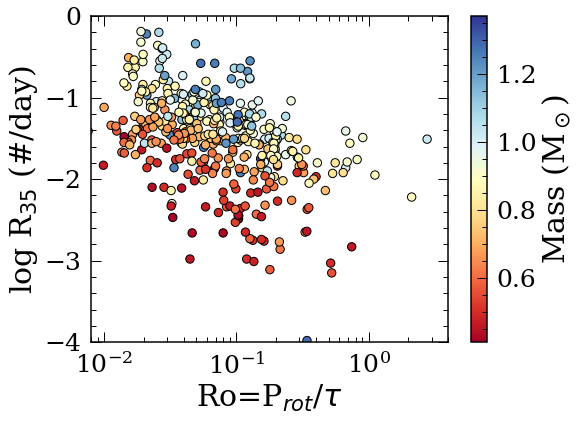

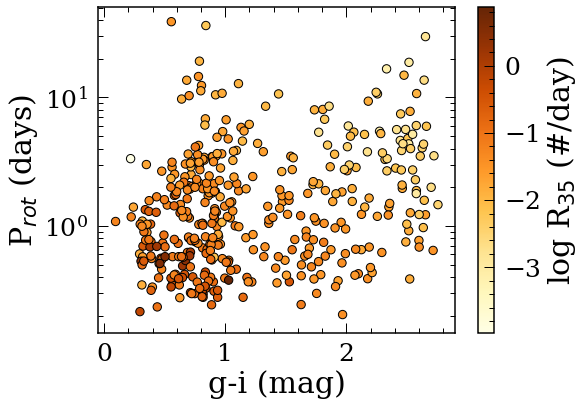

In [364]:
# FFD function generator (output in log cumulative flare frequency)
def FFD(alpha,beta,logFlareE):
    return alpha*logFlareE+beta

# calculate R35 from FFD
data['logR35']=FFD(data.alpha,data.beta,35.)

# mock FFD just to check if function looks right... (Fig1 left in 2019 paper)
data.loc[data['KIC']==6117832]
logE=np.array([33+0.5*i for i in range(7)])
plt.figure(figsize=(5,5))
plt.semilogy(logE,np.power(10.,FFD(data.alpha[2082],data.beta[2082],logE)),'k-')
plt.ylim([1e-5,1])
plt.title('KIC 6117832')


# R35
cm = plt.cm.get_cmap('RdYlBu')
plt.figure(figsize=(8,6))
plt.scatter(Ro,data.logR35,c=data.Mass,s=70, cmap=cm,edgecolors='k')
plt.xscale('log')
cb=plt.colorbar()
cb.set_label('Mass (M$_\odot$)')
plt.xlim([8e-3,4])
plt.ylim([-4,0])
plt.ylabel('log R$_{35}$ (#/day)')
plt.xlabel('Ro=P$_{rot}$/$\\tau$')

# g-i vs Prot
cm = plt.cm.get_cmap('YlOrBr')
plt.figure(figsize=(8,6))
plt.scatter(data.g_i,data.Prot,c=data.logR35,cmap=cm,s=70,edgecolors='k')
#plt.semilogy(data.g_i,data.Prot,'o')
cb=plt.colorbar()
cb.set_label('log R$_{35}$ (#/day)')
plt.yscale('log')
#plt.ylim([-3,0])
plt.ylabel('P$_{rot}$ (days)')
plt.xlabel('g-i (mag)')

For Fig 4 bottom plot and Fig 6 (R_1s) we will need L_kp, Fig 7 needs age from using model from https://iopscience.iop.org/article/10.1086/591785/pdf. Limitations of the data: Mostly young active stars